In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
file_path = "Credit Card Customer Data.csv"
data = pd.read_csv(file_path)
print(data.head())


   Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3  


In [10]:
features = ["Customer_Key", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Avg_Credit_Limit","Total_calls_made"]
data.rename(columns={"Customer Key": "Customer_Key"}, inplace=True)

# Drop rows with missing values in the specified features
data = data.dropna(subset=features)


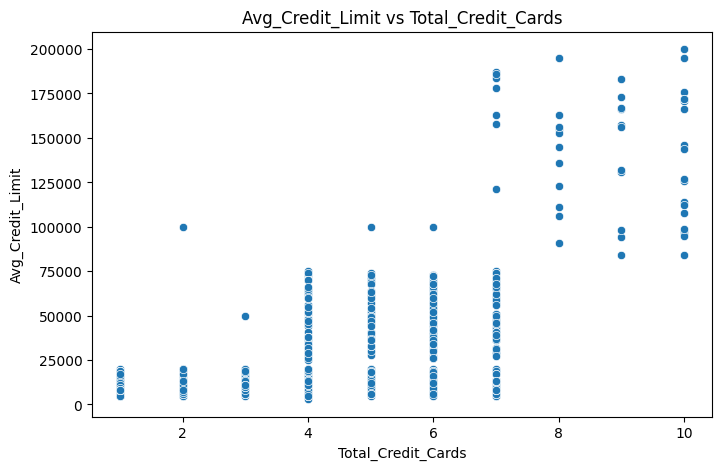

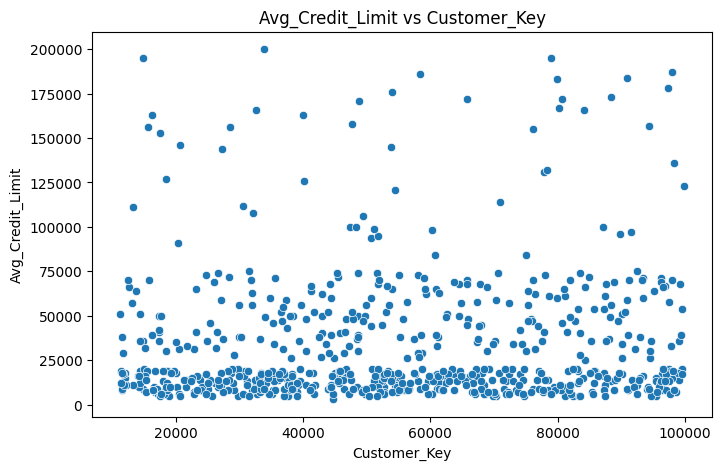

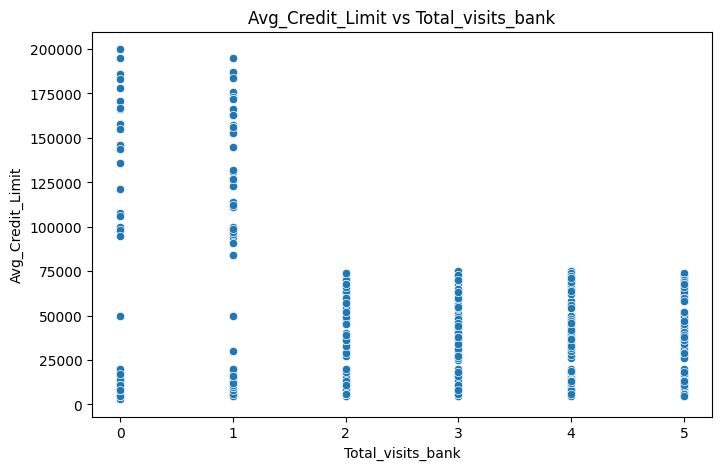

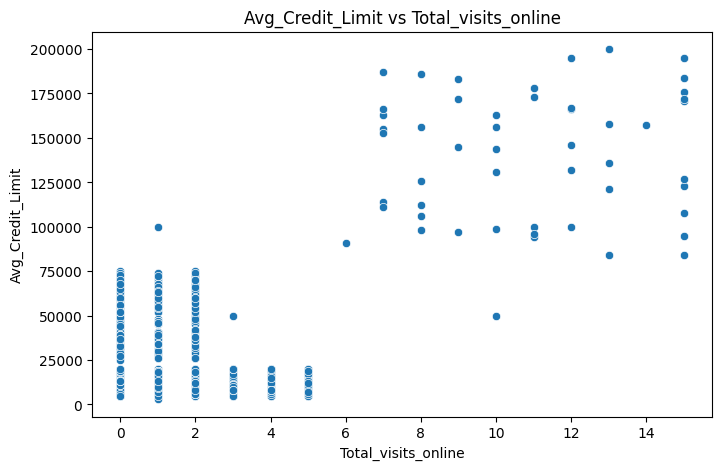

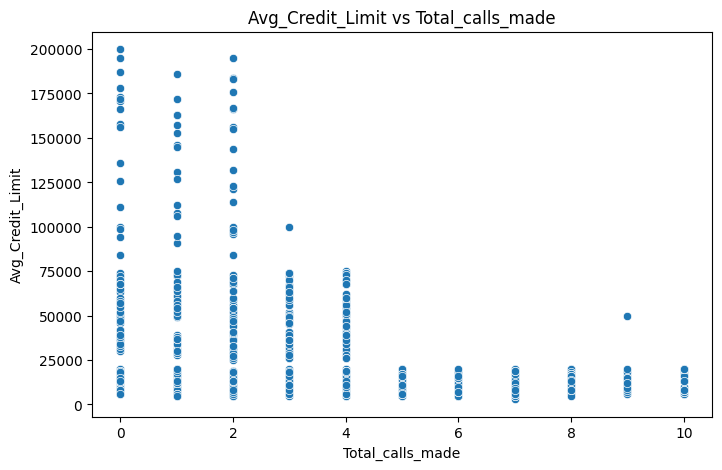

In [11]:
predictor_features = ["Total_Credit_Cards", "Customer_Key", "Total_visits_bank", "Total_visits_online", "Total_calls_made"]
target = "Avg_Credit_Limit"
for feature in predictor_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=data, x=feature, y=target)
    plt.title(f'{target} vs {feature}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

In [14]:
X = data[predictor_features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
coefficients = pd.DataFrame(model.coef_, predictor_features, columns=['Coefficient'])
print(coefficients)


Mean Squared Error: 533395070.1236473
R^2 Score: 0.5970534954912904
                     Coefficient
Total_Credit_Cards   7259.549203
Customer_Key            0.095126
Total_visits_bank   -2462.665267
Total_visits_online  6085.275020
Total_calls_made    -3456.581780


In [15]:
predictor_features = ["Total_Credit_Cards"]
target = "Avg_Credit_Limit"
X = data[predictor_features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
coefficients = pd.DataFrame(model.coef_, predictor_features, columns=['Coefficient'])
print(coefficients)


Mean Squared Error: 850256336.4012257
                     Coefficient
Total_Credit_Cards  10677.726001


In [17]:
predictor_features = ["Total_Credit_Cards", "Total_visits_bank", "Total_visits_online"]
target = "Avg_Credit_Limit"

X = data[predictor_features]
y = data[target]

# Splitong the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Printing the model coefficients
coefficients = pd.DataFrame(model.coef_, predictor_features, columns=['Coefficient'])
print(coefficients)


Mean Squared Error: 602746581.5831573
R^2 Score: 0.5446627804467601
                     Coefficient
Total_Credit_Cards   9776.935107
Total_visits_bank    -688.422579
Total_visits_online  5875.176263


# Conculsion
# Max Accuracy is obtained when the below features are present
# 1- "Total_Credit_Cards"
# 2- "Total_visits_bank"
# 3- "Total_visits_online"
# 4- "Total_calls_made" 